In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
stocks = pdr.get_data_yahoo('HARVIA.HE FIA1S.HE KOJAMO.HE FSKRS.HE'.split(),start='2018-06-01')['Close']
data = stocks.resample('BM').last()
data.tail()

Symbols,HARVIA.HE,FIA1S.HE,KOJAMO.HE,FSKRS.HE
Date,,,,
2021-02-26,28.500000,0.7165,15.880000,14.880000
2021-03-31,30.799999,0.7095,16.680000,15.860000
2021-04-30,43.500000,0.7202,18.030001,17.320000
2021-05-31,48.299999,0.7180,18.730000,17.000000
2021-06-30,48.000000,0.6976,19.100000,17.200001


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2018-06-29 to 2021-06-30
Freq: BM
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HARVIA.HE  37 non-null     float64
 1   FIA1S.HE   37 non-null     float64
 2   KOJAMO.HE  37 non-null     float64
 3   FSKRS.HE   37 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [22]:
change = pd.DataFrame()
for month in data:
    if month not in change:
        change[month]=np.log(data[month]).diff()
change.dropna(inplace=True)
change.head()
change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2018-07-31 to 2021-06-30
Freq: BM
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HARVIA.HE  36 non-null     float64
 1   FIA1S.HE   36 non-null     float64
 2   KOJAMO.HE  36 non-null     float64
 3   FSKRS.HE   36 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [26]:
change.corr()

,HARVIA.HE,FIA1S.HE,KOJAMO.HE,FSKRS.HE
HARVIA.HE,1.000000,0.156783,0.169242,0.362316
FIA1S.HE,0.156783,1.000000,-0.041618,0.314949
KOJAMO.HE,0.169242,-0.041618,1.000000,0.141704
FSKRS.HE,0.362316,0.314949,0.141704,1.000000


array([[<AxesSubplot:xlabel='HARVIA.HE', ylabel='HARVIA.HE'>,
        <AxesSubplot:xlabel='FIA1S.HE', ylabel='HARVIA.HE'>,
        <AxesSubplot:xlabel='KOJAMO.HE', ylabel='HARVIA.HE'>,
        <AxesSubplot:xlabel='FSKRS.HE', ylabel='HARVIA.HE'>],
       [<AxesSubplot:xlabel='HARVIA.HE', ylabel='FIA1S.HE'>,
        <AxesSubplot:xlabel='FIA1S.HE', ylabel='FIA1S.HE'>,
        <AxesSubplot:xlabel='KOJAMO.HE', ylabel='FIA1S.HE'>,
        <AxesSubplot:xlabel='FSKRS.HE', ylabel='FIA1S.HE'>],
       [<AxesSubplot:xlabel='HARVIA.HE', ylabel='KOJAMO.HE'>,
        <AxesSubplot:xlabel='FIA1S.HE', ylabel='KOJAMO.HE'>,
        <AxesSubplot:xlabel='KOJAMO.HE', ylabel='KOJAMO.HE'>,
        <AxesSubplot:xlabel='FSKRS.HE', ylabel='KOJAMO.HE'>],
       [<AxesSubplot:xlabel='HARVIA.HE', ylabel='FSKRS.HE'>,
        <AxesSubplot:xlabel='FIA1S.HE', ylabel='FSKRS.HE'>,
        <AxesSubplot:xlabel='KOJAMO.HE', ylabel='FSKRS.HE'>,
        <AxesSubplot:xlabel='FSKRS.HE', ylabel='FSKRS.HE'>]], dtype=object)

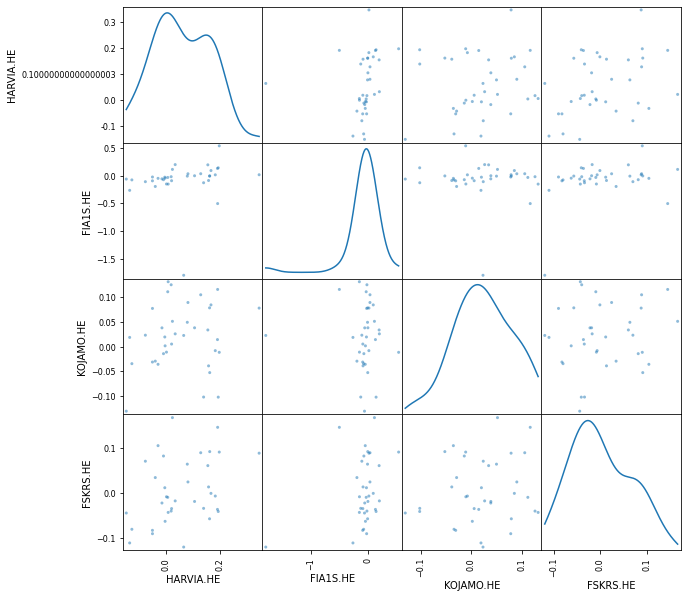

In [27]:
pd.plotting.scatter_matrix(change,diagonal = 'kde',figsize =(10,10))

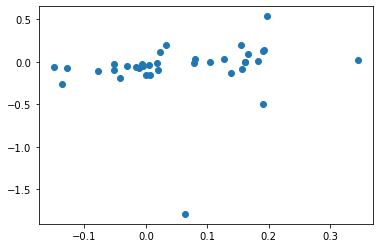

In [25]:
## Harvia and Finnair
plt.scatter(change['HARVIA.HE'],change['FIA1S.HE'])